### Particle Swarm Optimization (PSO) is a bio-inspired algorithm designed to find optimal solutions within a solution space. Unlike other optimization methods, PSO relies solely on the objective function and does not require gradients or differential forms. Additionally, PSO has minimal hyperparameters.

### Particle Swarm Optimization (PSO) is particularly effective for locating the maximum or minimum of a function f(X) defined in a multidimensional vector space. Imagine we have a function f(X) that yields a real value based on a vector parameter X (such as coordinates (x,y) in a plane), and X can assume virtually any value within the space (for instance, if f(X) represents altitude, we can find it for any point on the plane). In such cases, PSO can be applied. The PSO algorithm identifies the parameter X that produces the minimum value of f(X).

## Let our function be:

$$ 
f(x,y) = (x-1.28)^2 + (y-2.71)^2 + sin(3x+1.22) + sin(4y-1.73)
$$

In [1]:
# Importing Modules
import numpy as np
import matplotlib.pyplot as plt

# Objective function

In [2]:
def f(x,y):
    return (x-1.28)**2 + (y-2.71)**2 + np.sin(3*x+1.22) + np.sin(4*y-1.73)

# Contour plot of our function, the global minimum showed as "X" on the plot

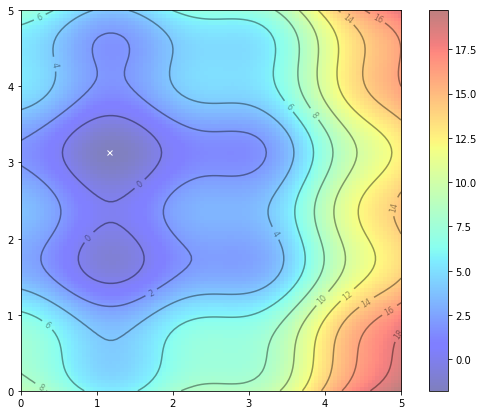

In [3]:
# Compute a meshgrip [0,5]x[0,5]
x, y = np.array(np.meshgrid(np.linspace(0,5,100), np.linspace(0,5,100)))
z = f(x, y)

# Find global minimum
x_min = x.ravel()[z.argmin()]
y_min = y.ravel()[z.argmin()]

# PLot contour
plt.figure(figsize=(10,7))
plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='jet', alpha=0.5)
plt.colorbar()
plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
plt.show()

## We create 100 particles and velocities at random locations in the region with normal distribution

In [4]:
n_particles = 100
X = np.random.rand(2, n_particles) * 5
V = np.random.randn(2, n_particles) * 0.1

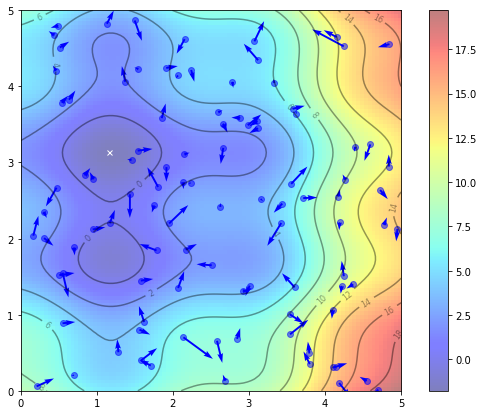

In [5]:
# Plot contour with particles and velocities 
def plot_contour():
    global V, X
    plt.figure(figsize=(10,7))
    plt.imshow(z, extent=[0, 5, 0, 5], origin='lower', cmap='jet', alpha=0.5)
    plt.colorbar()
    plt.plot([x_min], [y_min], marker='x', markersize=5, color="white")
    contours = plt.contour(x, y, z, 10, colors='black', alpha=0.4)
    plt.clabel(contours, inline=True, fontsize=8, fmt="%.0f")
    plt.scatter(X[0], X[1], marker='o', color='blue', alpha=0.5)
    plt.quiver(X[0], X[1], V[0], V[1], color='blue', width=0.005, angles='xy', scale_units='xy', scale=.7)
    plt.show()
    
plot_contour()

# The current globel best is their current position

In [6]:
# Initialize data
pbest = X
pbest_obj = f(X[0], X[1])
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

# Let’s set c1 = c2 = 0.2 and w = 0.4. Then update the velocities and positions according to the formula mentioned in the presentation.

$$
  X^i (t+1) = X^i (t) + V^i (t+1) \\ 
  V^i (t+1) = wV^i (t) + c_1r_1(pbest^i - X^i(t)) + c_2r_2(gbest-X^i (t))
$$

In [7]:
c1 = c2 = 0.2
w = 0.4

## One update

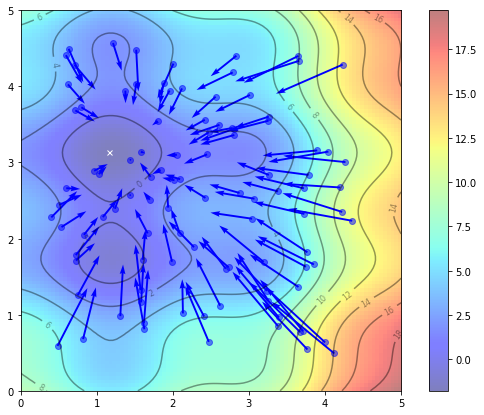

In [8]:
# One iteration update
r = np.random.rand(2)
V = w * V + c1*r[0]*(pbest - X) + c2*r[1]*(gbest.reshape(-1,1)-X)
X = X + V
obj = f(X[0], X[1])
pbest[:, (pbest_obj >= obj)] = X[:, (pbest_obj >= obj)]
pbest_obj = np.array([pbest_obj, obj]).max(axis=0)
gbest = pbest[:, pbest_obj.argmin()]
gbest_obj = pbest_obj.min()

# Plot contour
plot_contour()
